In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('startup_funding.csv')
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,Unnamed: 10
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN,NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN,NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN,NaN


In [4]:
sorted(df['Startup Name'].unique().tolist())

['"BYJU\\\\\'S"',
 '#Fame',
 '121Policy',
 '19th mile',
 '1Crowd',
 '1mg',
 '1mg (Healthkartplus)',
 '20Dresses',
 '33Coupons',
 '360Ride',
 '3Dexter',
 '3HCare',
 '3rdFlix',
 '48East',
 '4tigo',
 '5th Vital',
 '6Degree',
 '75F',
 '91SpringBoard',
 '99Games',
 '99PerHour',
 '9Stacks',
 'A&R Bon Vivants',
 'ABI Health',
 'AEON Learning',
 'AHA Taxis',
 'AYE Finance',
 'AadharAPI.com',
 'Aadyah',
 'Aahaa',
 'Aahaa Stores',
 'Aarav UAV',
 'Aasaanjobs',
 'Aashiyaan',
 'Aavishkaar-Intellecap Group',
 'AbeRuk',
 'Abhibus',
 'Absentia',
 'Absentia VR',
 'Ace Turtle',
 'Ace2three',
 'Acko',
 'ActOnMagic',
 'Actionable Analytics',
 'Active AI',
 'Active.ai',
 'Actofit',
 'Ad2pro',
 'AdPushUp',
 'AdStringO',
 'AdUrCup',
 'AdWyze',
 'Address Health',
 'AdmitKard',
 'Advanced Structures India',
 'Advantage Club',
 'Advenio',
 'Adytude',
 'Aequm',
 'AerMed',
 'Affimity',
 'Affordplan',
 'Agara Labs',
 'AgentDesks',
 'Agricxlab',
 'Agrostar',
 'Agrowave',
 'AirCTO',
 'AirMed Labs',
 'AirZaar',
 'Air

In [5]:
df = df.drop(columns=['Remarks','Unnamed: 10'])

In [6]:
df.set_index('Sr No', inplace= True)

In [7]:
df.rename(columns={
    'Date dd/mm/yyyy': 'date',
    'Startup Name': 'startup',
    'Industry Vertical': 'vertical',
    'SubVertical': 'subvertical',
    'City  Location': 'city',
    'Investors Name': 'investors',
    'InvestmentnType': 'round',
    'Amount in USD': 'amount'

}, inplace= True)

In [8]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [9]:
df['amount'] = df['amount'].fillna('0')

In [10]:
df['amount'] = df['amount'].str.replace(',','')
df['amount'] = df['amount'].str.replace('undisclosed','0')
df['amount'] = df['amount'].str.replace('unknown','0')
df['amount'] = df['amount'].str.replace('Undisclosed','0')

In [11]:
df = df[df['amount'].str.isdigit()]

In [12]:
df['amount'] = df['amount'].astype('float')

In [13]:
def to_inr(dollar):
    inr = dollar * 82.5
    return inr/10000000 

In [14]:
df['amount'] = df['amount'].apply(to_inr)

In [15]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [16]:
df['date'] = df['date'].replace('05/072018', '05/07/2018')

In [17]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

/var/folders/gv/yrj7qx0d6t5gcg_h5bmfd6xc0000gn/T/ipykernel_57248/2370506791.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [18]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3027 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3005 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [20]:
df = df.dropna(subset=['date', 'startup', 'vertical', 'city', 'investors', 'round', 'amount'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2822 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2822 non-null   datetime64[ns]
 1   startup      2822 non-null   object        
 2   vertical     2822 non-null   object        
 3   subvertical  2078 non-null   object        
 4   city         2822 non-null   object        
 5   investors    2822 non-null   object        
 6   round        2822 non-null   object        
 7   amount       2822 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.4+ KB


In [22]:
df.to_csv('startup_cleaned.csv',index = False)

In [23]:
sorted(set(df['investors'].str.split(',').sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [24]:
df[df['investors'].str.contains('IDG Ventures')].head()[['date','startup','vertical','city','round','amount']]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
102,2019-04-13,Tripoto,Social Media,New Delhi,Series B,29.628844
223,2018-07-30,Cure Fit,Consumer Internet,Bengaluru,Private Equity,990.000000
259,2018-02-05,Bizongo,Consumer Internet,Mumbai,Private Equity,181.500000
310,2018-04-26,POPxo,Technology,Delhi,Private Equity,45.375000
439,2017-07-12,eShakti,Ecommerce,Chennai,Debt Funding,18.975000


In [25]:
df[df['investors'].str.contains('IDG Ventures')].groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Cure Fit                 990.000000
Lenskart                 495.000000
Bizongo                  206.250000
CureFit                  206.250000
Curefit                  123.750000
Fintellix                123.750000
Xpressbees               103.125000
FirstCry.com              82.500000
Uniphore                  72.600000
POPxo                     70.950000
HealthifyMe               49.500000
\\xc2\\xa0CloudCherry     49.500000
Sigtuple                  47.850000
Flyrobe                   43.725000
RentMojo                  41.250000
Aasaanjobs                41.250000
Vayana                    33.000000
Agrostar                  33.000000
PlaySimple                33.000000
Blowhorn                  30.112500
Tripoto                   29.628844
Active.ai                 24.750000
Heckyl                    22.275000
CreditMantri              20.625000
eShakti                   18.975000
Zimmber                   16.500000
POPxo.com                 16.500000
RentoMojo           

<Axes: ylabel='amount'>

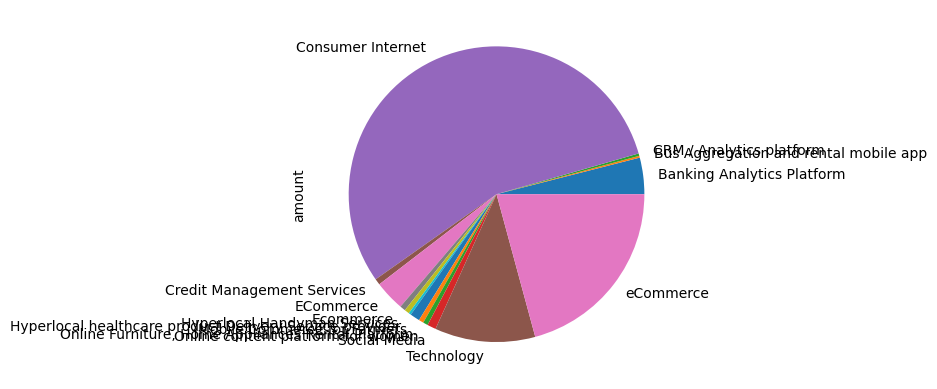

In [26]:
df[df['investors'].str.contains('IDG Ventures')].groupby('vertical')['amount'].sum().plot(kind='pie')

<Axes: ylabel='amount'>

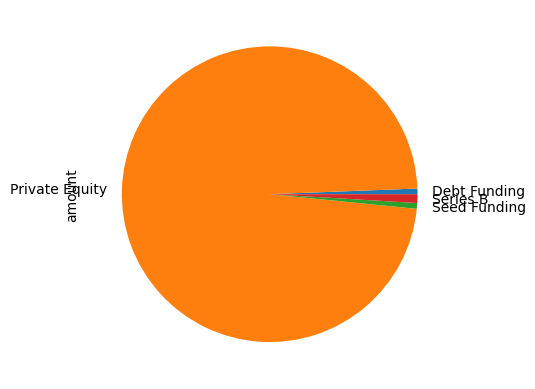

In [27]:
df[df['investors'].str.contains('IDG Ventures')].groupby('round')['amount'].sum().plot(kind='pie')

<Axes: ylabel='amount'>

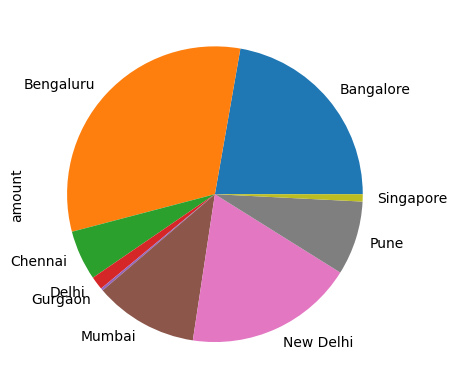

In [28]:
df[df['investors'].str.contains('IDG Ventures')].groupby('city')['amount'].sum().plot(kind='pie')

In [29]:
df['year'] = df['date'].dt.year

In [30]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020


<Axes: xlabel='year'>

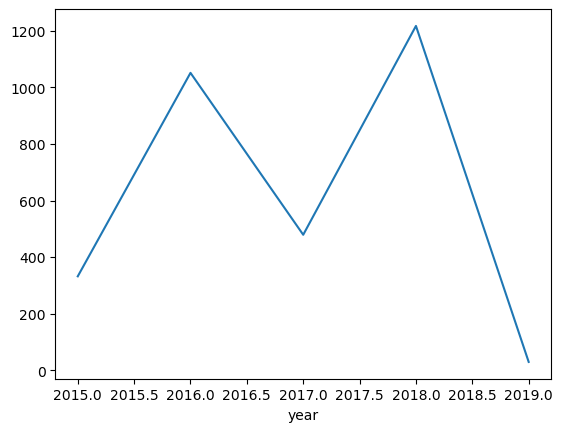

In [31]:
df[df['investors'].str.contains('IDG Ventures')].groupby('year')['amount'].sum().plot()

<Axes: ylabel='amount'>

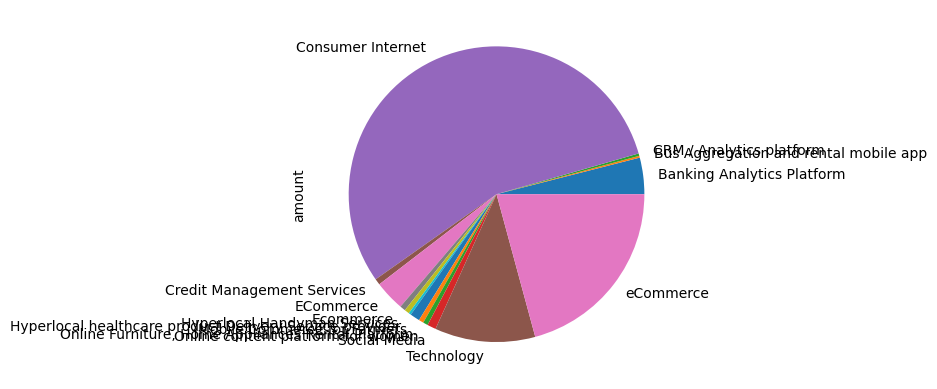

In [35]:
df[df['investors'].str.contains('IDG Ventures')].groupby('vertical')['amount'].sum().plot(kind='pie')

#### GENERAL ANALYSIS

In [37]:
round(df['amount'].sum())

296492

In [38]:
round(df['amount'].max())

32175

In [41]:
df.groupby('startup')['amount'].max().sort_values(ascending=False).head(1).values[0]

32175.0

In [43]:
round(df.groupby('startup')['amount'].sum().mean())

129

In [46]:
df['startup'].nunique()

2299

In [49]:
df['month'] = df['date'].dt.month

In [50]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020,9
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020,1
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020,9
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020,2
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020,2


In [55]:
df.groupby(['year','month'])['startup'].count().reset_index

In [58]:
temp_df = df.groupby(['year','month'])['amount'].sum().reset_index()

In [59]:
temp_df['x_axis'] = temp_df['month'].astype('str') + '-' + temp_df['year'].astype('str')

In [60]:
temp_df[['amount','x_axis']]

,amount,x_axis
0,5274.637500,1-2015
1,1567.178250,2-2015
2,1910.658750,3-2015
3,4511.058750,4-2015
4,1401.427500,5-2015
...,...,...
58,3667.125000,12-2019
59,140.649250,1-2020
60,39.600000,2-2020
61,1801.460595,9-2020
